# Datawhale 零基础入门数据挖掘-Task2 数据分析

## EDA主要目标
1. 了解数据集，熟悉数据集。数据集数据特征的数据形式，是离散特征，还是连续特征，构成比例是怎么样的。

2. 对数据进行一些探索性的分析。观察变量之间的相会关系以及变量与预测值之间的存在关系。

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from collections import Counter
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

## 2.1 载入数据并简略观察

In [2]:
train_data = pd.read_csv('/Users/benjamin/study/data complete/天池/二手车交易价格预测/data/used_car_train_20200313.csv', sep=' ')
test_data = pd.read_csv('/Users/benjamin/study/data complete/天池/二手车交易价格预测/data/used_car_testA_20200313.csv', sep=' ')
print('训练数据集大小：', train_data.shape)
print('测试数据集大小：', test_data.shape)
train_data.head()

训练数据集大小： (150000, 31)
测试数据集大小： (50000, 30)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [3]:
test_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,0.0,1440,0,0,20160329,49.593127,5.246568,1.001130,-4.122264,0.737532,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,1.0,5419,0,0,20160404,42.395926,-3.253950,-1.753754,3.646605,-0.725597,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,0.0,5045,0,0,20160308,45.841370,4.704178,0.155391,-1.118443,-0.229160,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,0.0,4023,0,0,20160325,46.440649,4.319155,0.428897,-2.037916,-0.234757,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,0.0,3103,0,0,20160309,42.184604,-3.166234,-1.572058,2.604143,0.387498,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290


## 2.2 总揽数据概况

In [4]:
## 通过 `info()` 查看数据类型
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

**发现 `notRepairedDamage` 为object类型，后续可以观察下该特征不同值的统计量**

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               50000 non-null int64
name                 50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             48587 non-null float64
fuelType             47107 non-null float64
gearbox              48090 non-null float64
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null int64
offerType            50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non

In [6]:
# 通过describe() 来熟悉数据的相关统计量
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


**发现seller最小值，2分位，3分位数据均为0，数据严重倾斜；offerType 全部数值均为0, 没有意义。可以删掉**

In [7]:
train_data['seller'].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [8]:
train_data.offerType.value_counts()

0    150000
Name: offerType, dtype: int64

In [9]:
test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,2590.604820,0.0,0.0,2.016033e+07,44.418233,-0.037238,0.050534,0.084640,0.015001,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,1876.970263,0.0,0.0,7.951521e+01,2.429950,3.642562,2.856341,2.026510,1.193026,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,2.015061e+07,28.987024,-4.137733,-4.205728,-5.638184,-4.287718,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1030.000000,0.0,0.0,2.016031e+07,43.139621,-3.191909,-0.971266,-1.453453,-0.928089,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,2219.000000,0.0,0.0,2.016032e+07,44.611084,-3.050756,-0.388117,0.097881,-0.070225,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3857.000000,0.0,0.0,2.016033e+07,45.992639,3.997323,0.240548,1.562700,0.863731,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,8121.000000,0.0,0.0,2.016041e+07,51.751684,7.553517,18.394570,9.381599,5.270150,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


In [10]:
test_data['seller'].value_counts()

0    50000
Name: seller, dtype: int64

In [11]:
test_data.offerType.value_counts()

0    50000
Name: offerType, dtype: int64

In [12]:
del train_data['seller']
del train_data['offerType']
del test_data['seller']
del test_data['offerType']

## 2.3 检查数据缺失和异常值情况

### 2.3.1 观察缺省值

In [13]:
# 查看每列的空值
train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [14]:
test_data.isna().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

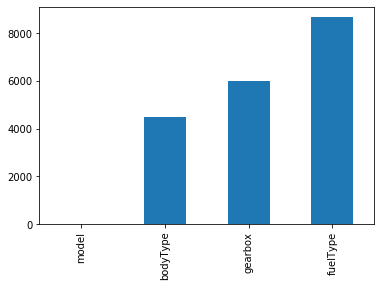

In [15]:
## 可视化nan
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

通过直观地了解哪些列存在空值，空值个数是否比较大。如果比较小，可以选择填充；如果是cart树或lgb等树模型可以直接空缺，让模型自己去优化；如果空值比较多，可以考虑删掉对应的特征

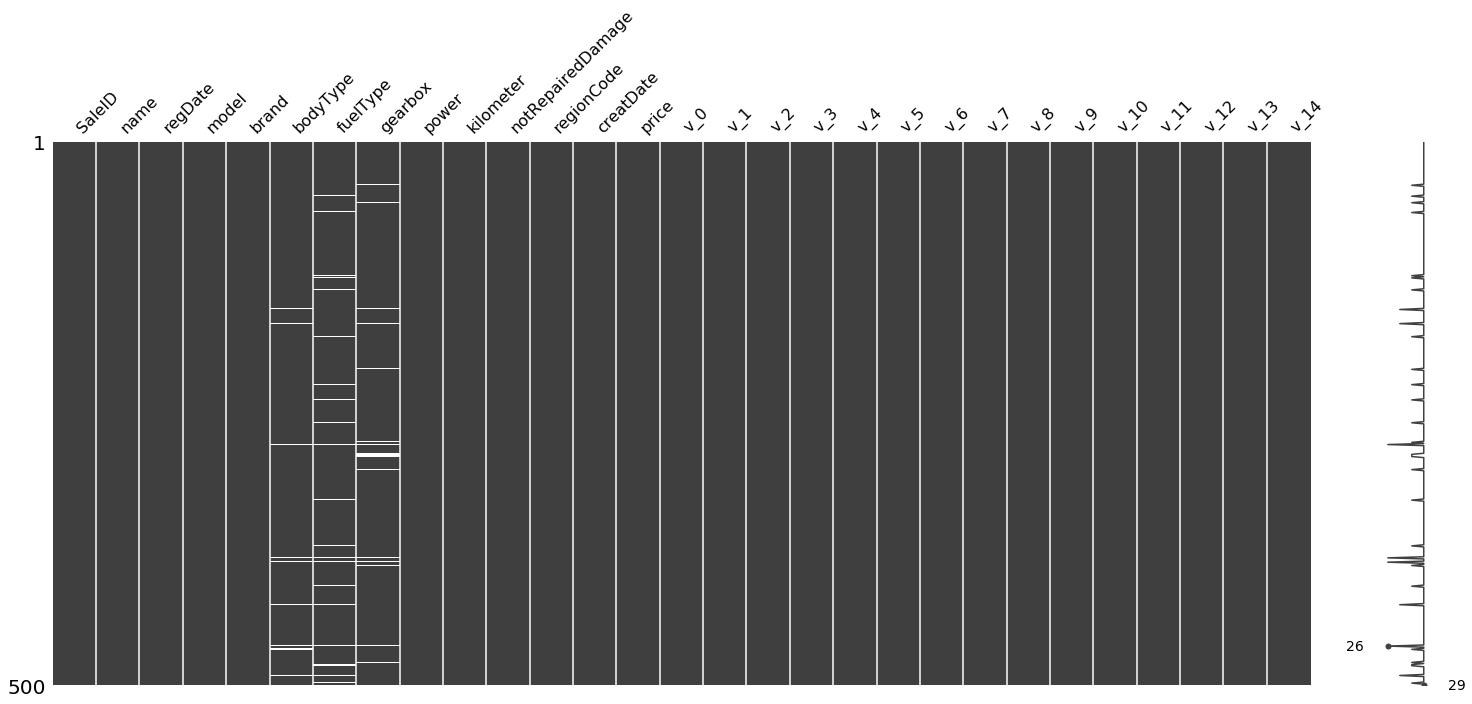

In [16]:
# 通过missingno可视化空值
msno.matrix(train_data.sample(500))

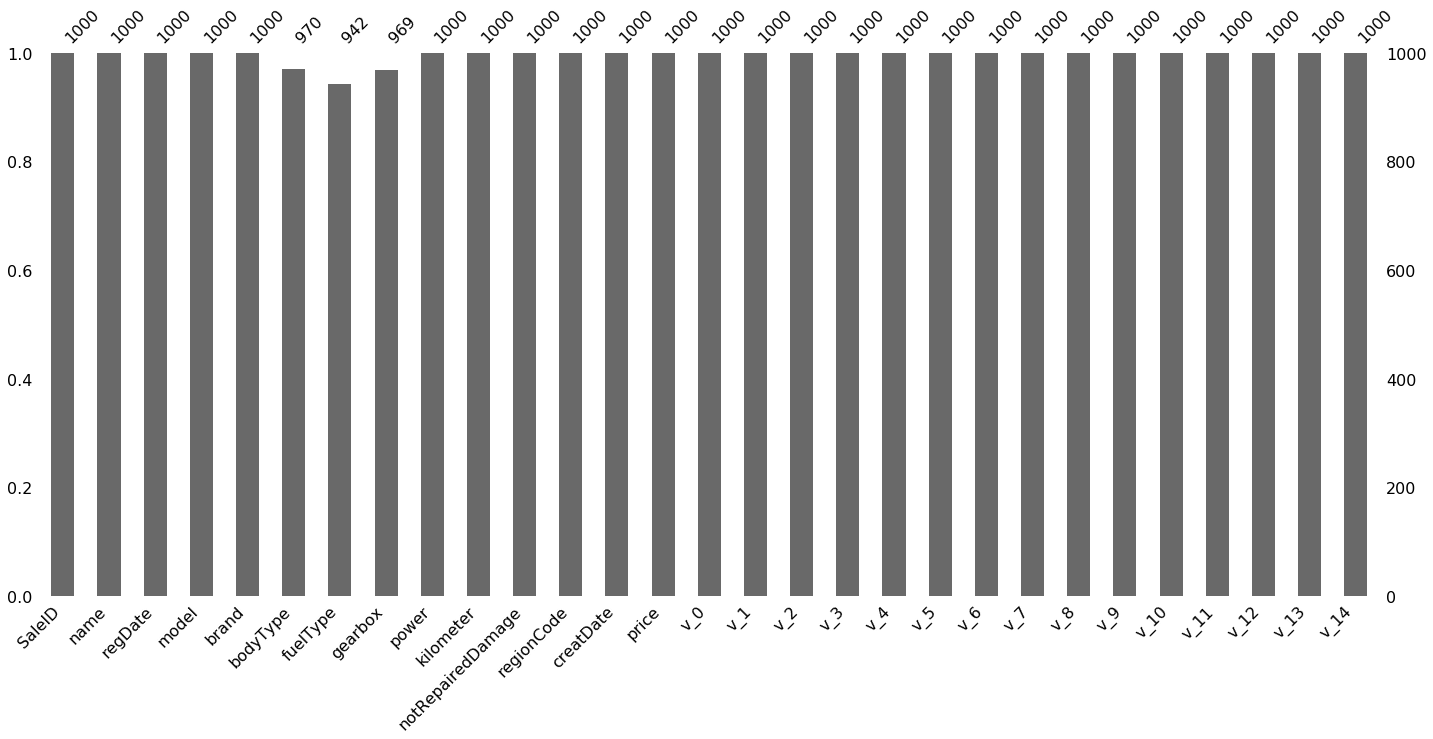

In [17]:
msno.bar(train_data.sample(1000))

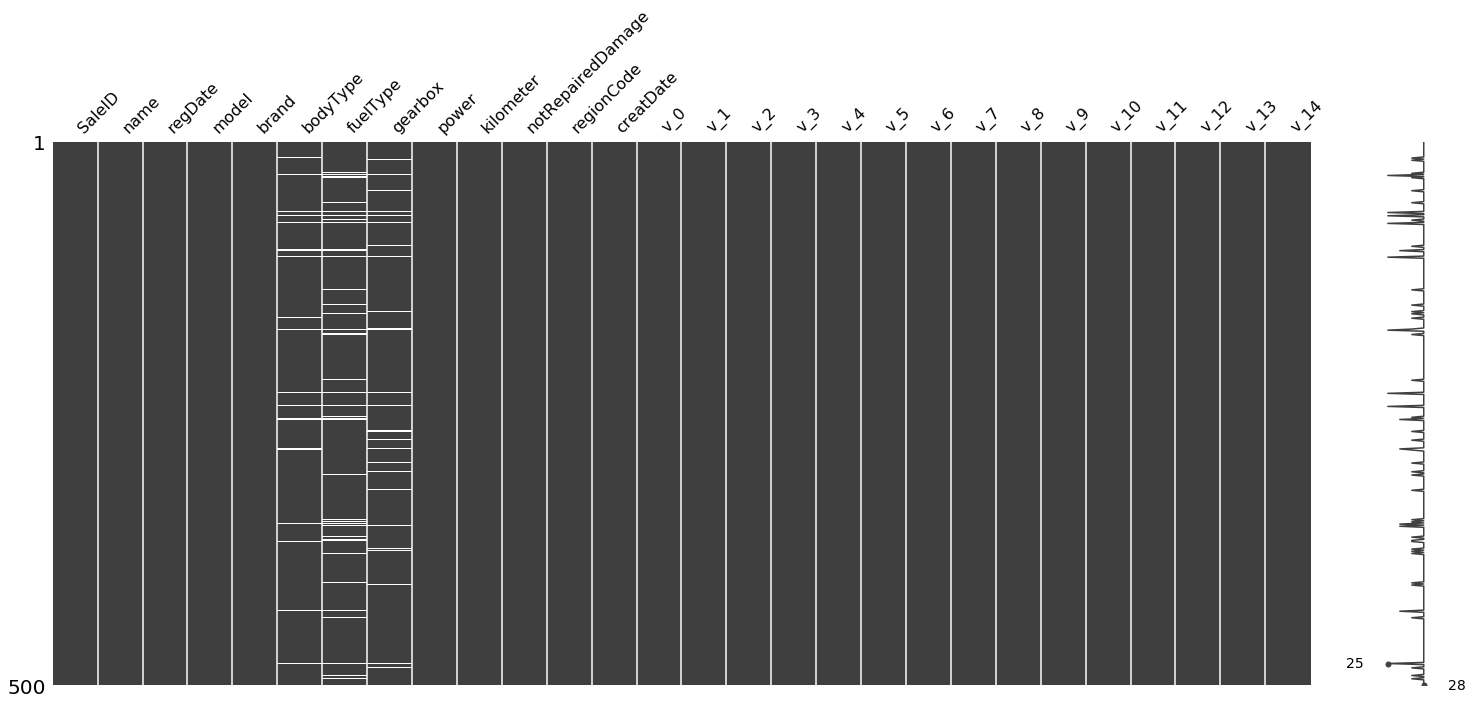

In [18]:
msno.matrix(test_data.sample(500))

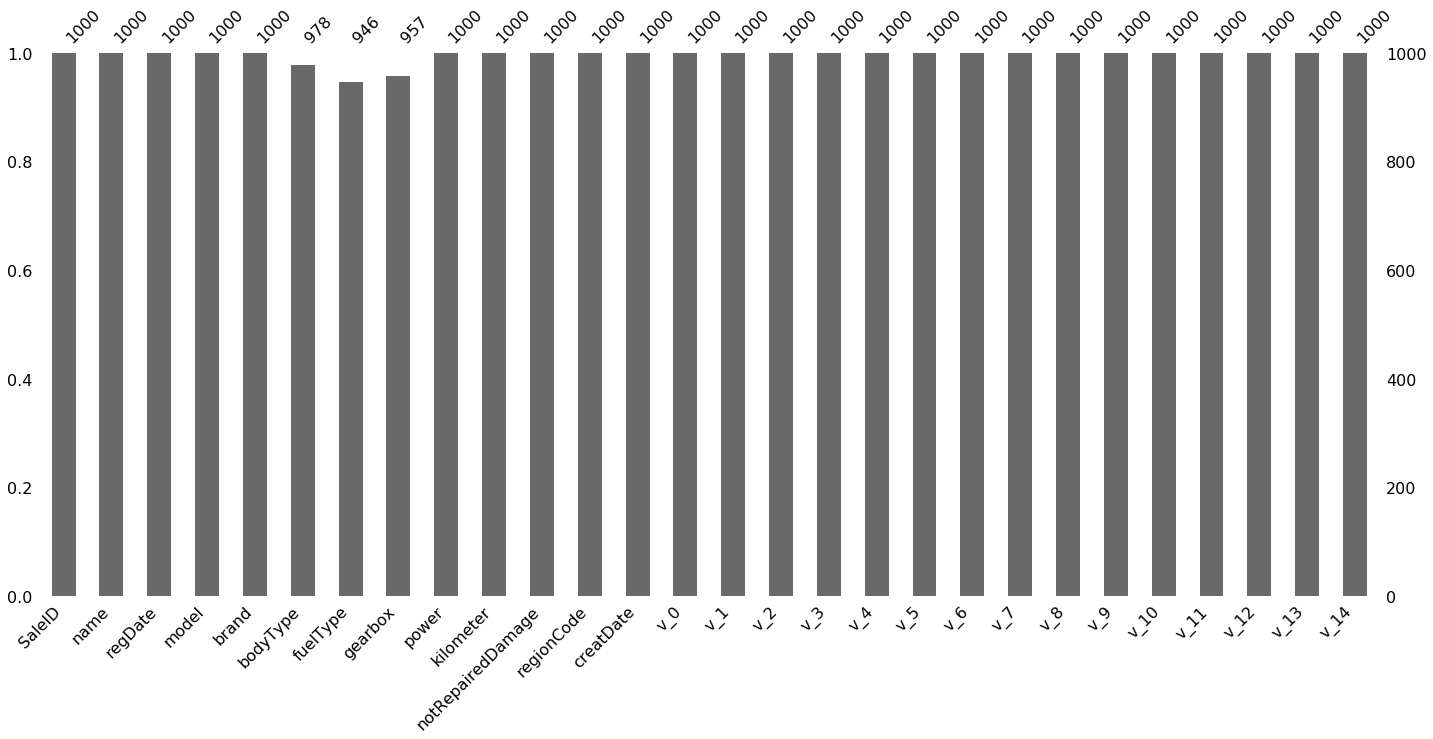

In [19]:
msno.bar(test_data.sample(1000))

观察到训练集有4列有缺省值，测试集有3列有缺省值。
### 2.3.2 观察异常值

前面通过info()观察数据类型时，发现数据中 notRepairedDamage 为object类型。观察下不同值的统计量

In [20]:
train_data.notRepairedDamage.value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

可以看出来 '-' 也为空值，将它替换为None

In [21]:
train_data.notRepairedDamage.replace('-', np.nan, inplace=True)
test_data.notRepairedDamage.replace('-', np.nan, inplace=True)

In [22]:
test_data.notRepairedDamage = test_data.notRepairedDamage.map(
    lambda x: float(x) if x is not None else x)
train_data.notRepairedDamage = train_data.notRepairedDamage.map(
    lambda x: float(x) if x is not None else x)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    125676 non-null float64
regionCode           150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4                  150000 non-null float64
v_5                  150000 non-null float64
v_6  

In [24]:
train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [25]:
test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage    8031
regionCode              0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

### 2.3.3 了解预测值分布情况

In [26]:
train_data.price

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [27]:
train_data.price.value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

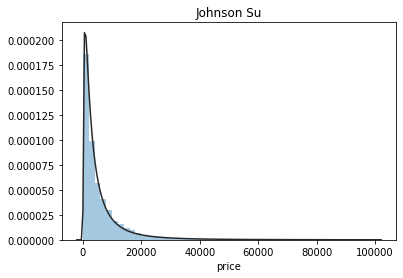

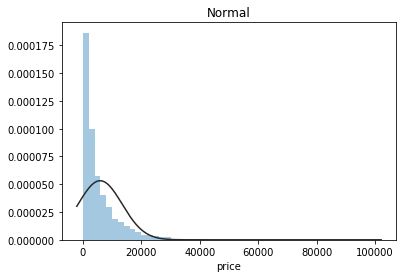

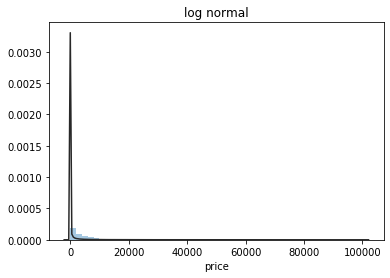

In [28]:
## 数据总体分布概况
import scipy.stats as st
y = train_data['price']
plt.figure(1);plt.title('Johnson Su')
sns.distplot(y, kde=False,fit=st.johnsonsu)
plt.figure(2);plt.title('Normal')
sns.distplot(y, kde=False,fit=st.norm)
plt.figure(3);plt.title('log normal')
sns.distplot(y, kde=False,fit=st.lognorm)

In [29]:
## 查看数据的偏度和峰度
# 正态分布作为基准，偏度和峰度都为0
## 偏度：数据相对于正态分布左右偏的程度。偏度>0，数据右边尾长；偏度<0，数据左边尾长
## 峰度：数据的陡峭程度。峰度>0，数据越陡峭，越尖；峰度<0，数据越平坦
print('Skewness: %f' % train_data['price'].skew())
print('kurt: %f' % train_data['price'].kurt())

Skewness: 3.346487
kurt: 18.995183


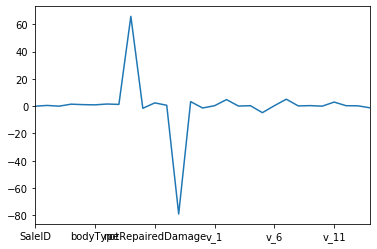

In [30]:
train_data.skew().plot()

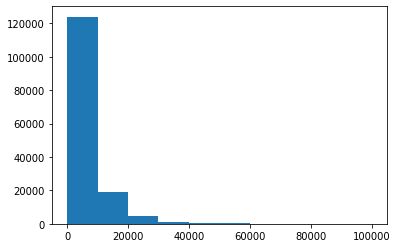

In [31]:
## 查看预测值的具体频数
plt.hist(train_data.price)
plt.show()

发现大于20000的值很少，可以考虑将这些值当作异常值删掉或者填充

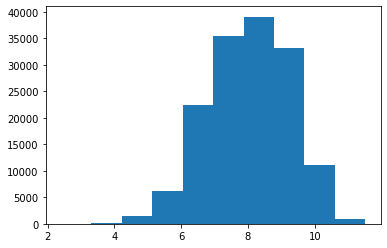

In [32]:
## 查看log变换后的数据分布情况
plt.hist(np.log(train_data.price))
plt.show()

log变换之后的数据分布较为均为，可以考虑进行log变换之后进行预测

### 2.3.4 类别特征和数字特征
一般我们会观察类别特征的unique分布，看看数字特征之间的相关性，特征于目标值之间的相关性

**主要特征：**
* name - 汽车编码
* regDate - 汽车注册时间
* model - 车型编码
* brand - 品牌
* bodyType - 车身类型
* fuelType - 燃油类型
* gearbox - 变速箱
* power - 汽车功率
* kilometer - 汽车行驶公里
* notRepairedDamage - 汽车有尚未修复的损坏
* regionCode - 看车地区编码
* creatDate - 广告发布时间
* price - 汽车价格
* v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' 匿名特征

类别特征都经过了labelencoding, 需要人工区分开来。
没有经过labelencoding的数据可以通过下列方式进行区分

```python
numeric_features = train_data.select_dtypes(include=[np.number])
categorical_features = train_data.select_dtypes(include=[np.object])
```

In [33]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14', 'price']
categorical_features =  ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']

#### 类别特征的unique分布

In [34]:
for cat in categorical_features:
    print(cat + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat, train_data[cat].nunique()))
    print(train_data[cat].value_counts())

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
body

### 数字特征相关性分析

In [35]:
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [36]:
corr = train_data[numeric_features].corr()
corr

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price
power,1.000000,-0.019631,0.215028,0.023746,-0.031487,-0.185342,-0.141013,0.119727,0.025648,-0.060397,0.155956,-0.140203,-0.092717,-0.122107,0.161990,-0.103430,-0.023808,0.219834
kilometer,-0.019631,1.000000,-0.225034,-0.022228,-0.110375,0.402502,-0.214861,0.049502,-0.024664,-0.017835,-0.407686,-0.149422,0.083358,0.066542,-0.370153,-0.285158,-0.120389,-0.440519
v_0,0.215028,-0.225034,1.000000,0.245049,-0.452591,-0.710480,-0.259714,0.726250,0.243783,-0.584363,0.514149,-0.186243,-0.582943,-0.667809,0.415711,-0.136938,-0.039809,0.628397
v_1,0.023746,-0.022228,0.245049,1.000000,-0.001133,-0.001915,-0.000468,0.109303,0.999415,-0.110806,-0.298966,-0.007698,-0.921904,0.370445,-0.087593,0.017349,0.002143,0.060914
v_2,-0.031487,-0.110375,-0.452591,-0.001133,1.000000,0.001224,-0.001021,-0.921857,0.023877,0.973689,0.180285,-0.236164,0.274341,0.800915,0.535270,-0.055376,-0.013785,0.085322
v_3,-0.185342,0.402502,-0.710480,-0.001915,0.001224,1.000000,-0.001694,-0.233412,-0.000747,0.191278,-0.933161,0.079292,0.247385,0.429777,-0.811301,-0.246052,-0.058561,-0.730946
v_4,-0.141013,-0.214861,-0.259714,-0.000468,-0.001021,-0.001694,1.000000,-0.259739,-0.011275,-0.054241,0.051741,0.962928,0.071116,0.110660,-0.134611,0.934580,-0.178518,-0.147085
v_5,0.119727,0.049502,0.726250,0.109303,-0.921857,-0.233412,-0.259739,1.000000,0.091229,-0.939385,0.010686,-0.050343,-0.440588,-0.845954,-0.258521,-0.162689,0.037804,0.164317
v_6,0.025648,-0.024664,0.243783,0.999415,0.023877,-0.000747,-0.011275,0.091229,1.000000,-0.085410,-0.294956,-0.023057,-0.917056,0.386446,-0.070238,0.000758,-0.003322,0.068970
v_7,-0.060397,-0.017835,-0.584363,-0.110806,0.973689,0.191278,-0.054241,-0.939385,-0.085410,1.000000,0.028695,-0.264091,0.410014,0.813175,0.385378,-0.154535,-0.020218,-0.053024


In [37]:
corr.price.sort_values(ascending=False)

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64

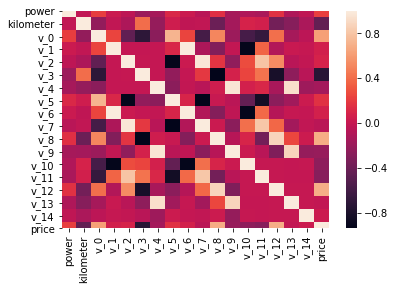

In [38]:
sns.heatmap(corr)

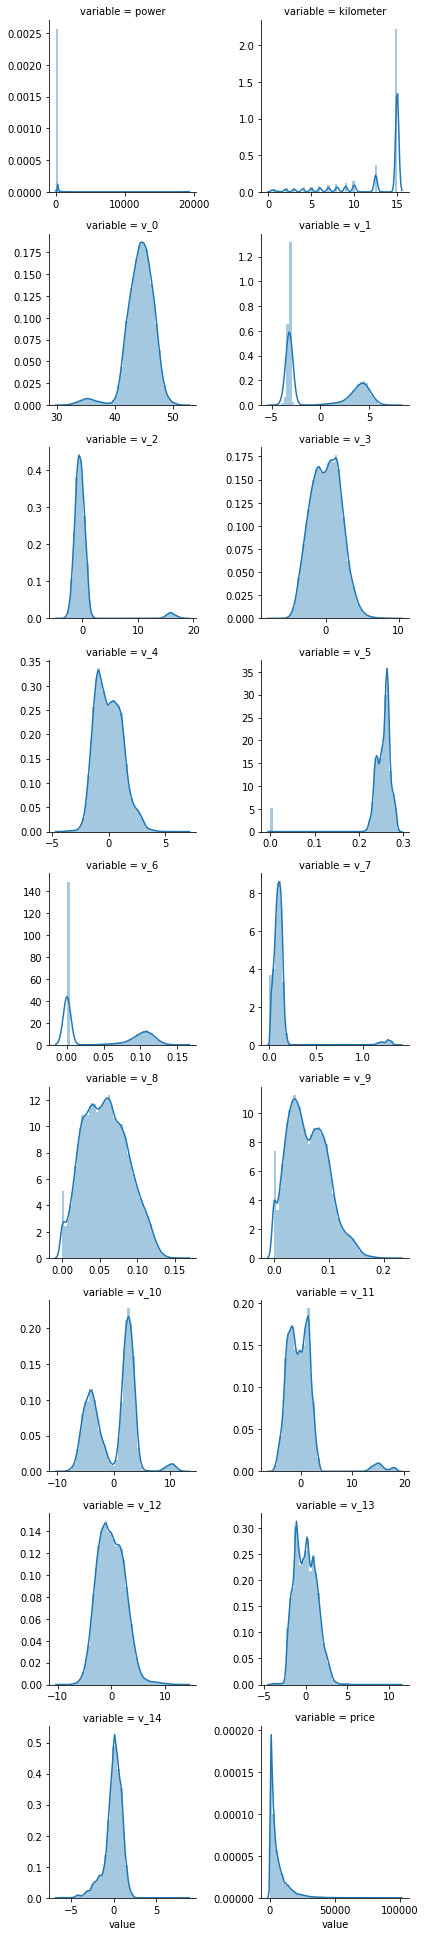

In [39]:
## 每个数字特征分布可视化
f = pd.melt(train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

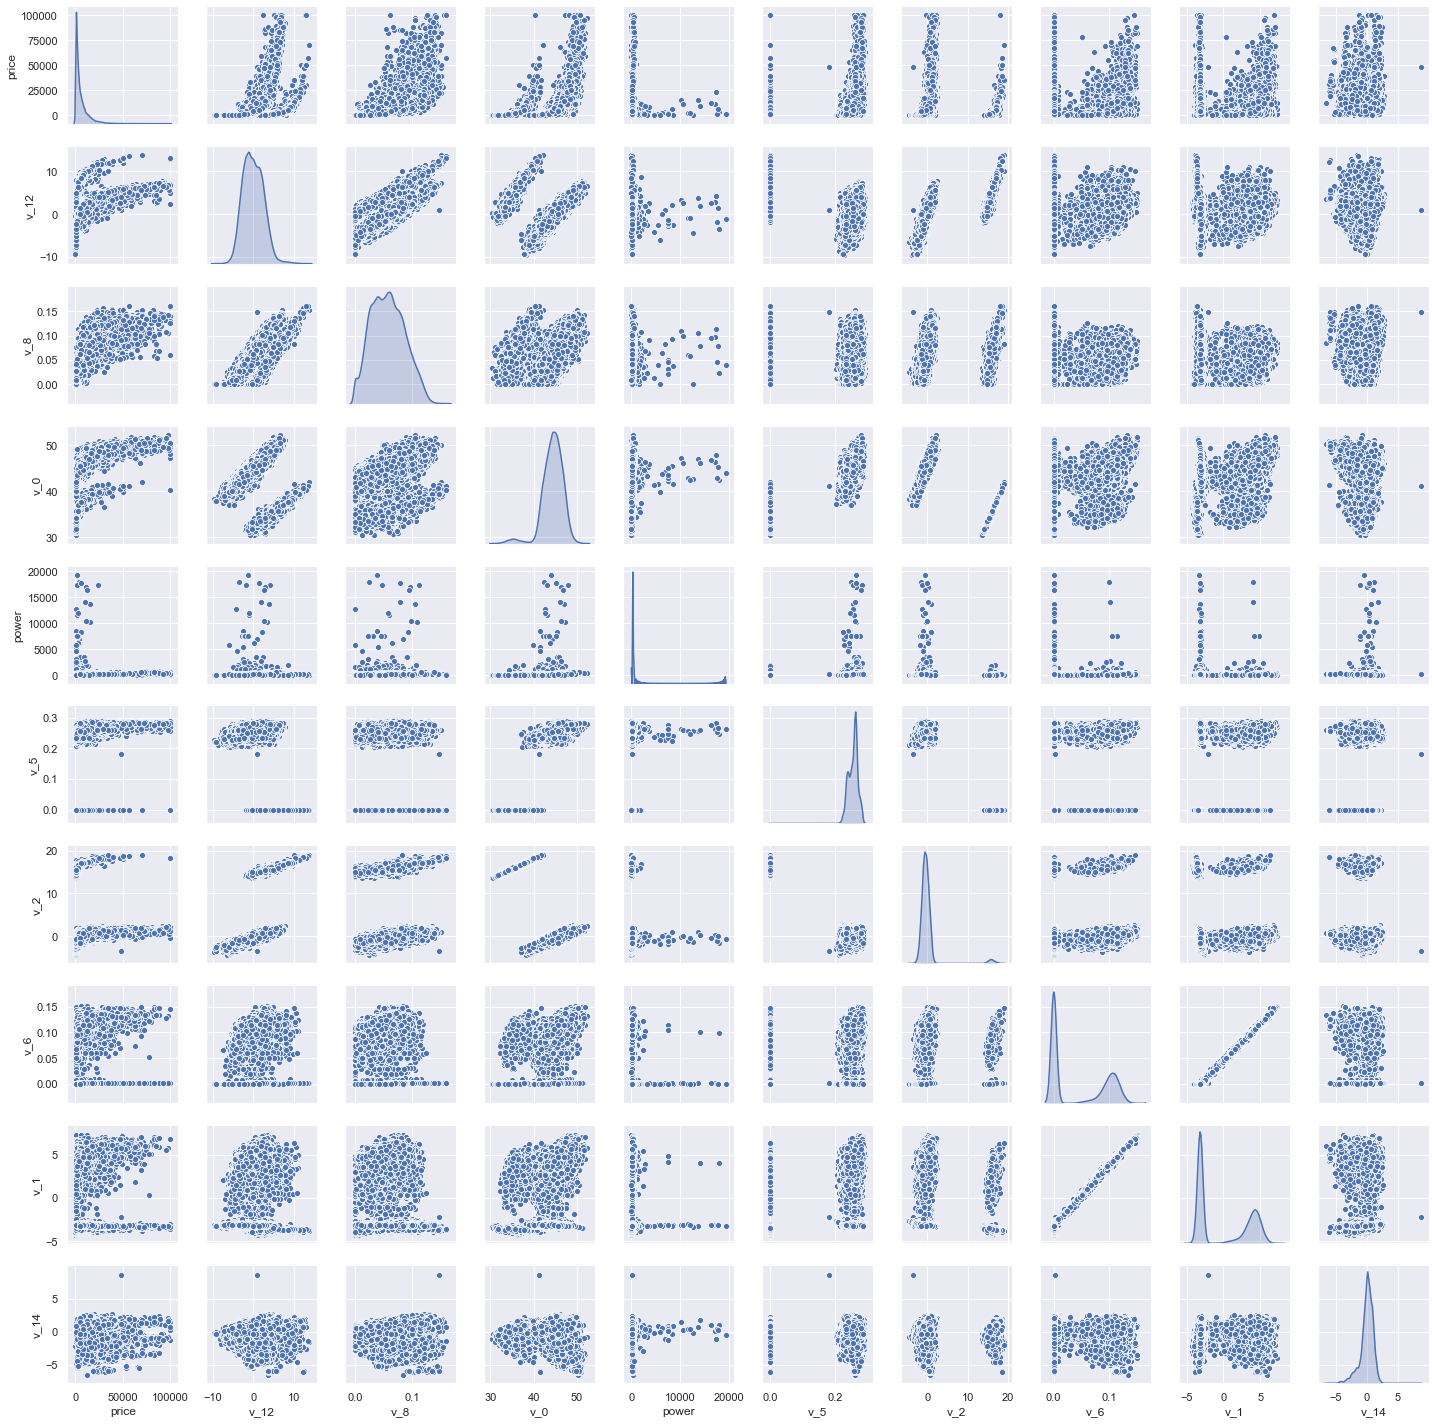

In [40]:
### 数字特征之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5', 'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

### 用pandas_profiling 生成数据报告

In [47]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(train_data)
pfr.to_file('./example.html')

### 删除异常值

In [46]:
def outliers_proc(data, col_name, scale=3):
    """
     用于清洗异常值，默认用 box_plot（scale=3）进行清洗
     :param data: 接收 pandas 数据格式
     :param col_name: pandas 列名
     :param scale: 尺度
     :return:
    """
    def box_plot_outliers(data_ser, box_scale):
        """
         利用箱线图去除异常值
         :param data_ser: 接收 pandas.Series 数据格式
         :param box_scale: 箱线图尺度，
         :return:
         """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up) 
        return (rule_low, rule_up), (val_low, val_up)
    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


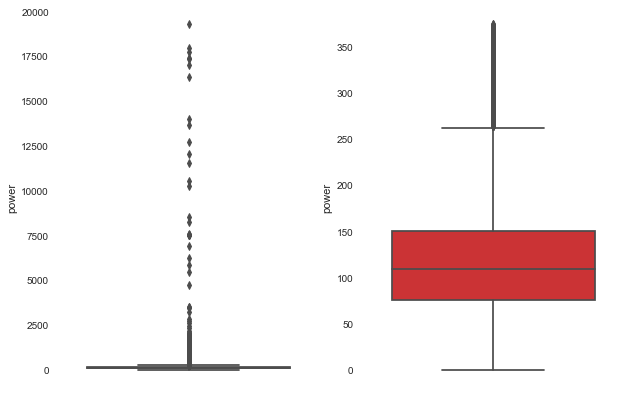

In [49]:
train_data = outliers_proc(train_data, 'power', scale=3)

### 特征构造

In [75]:
# 训练集和测试集放在一起，方便构造特征
train_data['train'] = 1
test_data['train'] = 0
data = pd.concat([train_data, test_data], ignore_index=True, sort=False)

In [76]:
# createDate是二手汽车广告发布时间，regDate是汽车发布时间，两者之差反应了汽车使用时间，汽车使用时间与价格是成反比的
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce')-
                    pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [77]:
data['used_time'].isnull().sum()

15072

发现有15k左右的样本时间是有问题的。
这部分数据可以删除也可以保留。15k的样本数量比较多，不建议删除
如果是用决策树之类的算法，可以处理缺失值，可以不用管。

In [78]:
## 观察下缺失值
data[data['used_time'].isnull()][['regDate', 'creatDate']]

,regDate,creatDate
14,20070009,20160402
20,19970004,20160311
22,19970008,20160326
42,19960009,20160328
51,20020006,20160325
...,...,...
198991,20000001,20160325
198996,20010001,20160322
199007,20030003,20160401
199021,20080004,20160318


**发现缺失值主要是汽车注册时间有点问题，月份都是00，后续可以考虑把这部分月份值设为1月或者其他月份，看看效果。**

In [79]:
## 从邮编中提取城市信息，这是利用先验知识进行特征构造
data['city'] = data['regionCode'].apply(lambda x: str(x)[:-3])

In [80]:
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train,used_time,city
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,20160404,1850.0,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1,4385.0,1
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,NaN,4366,20160309,3600.0,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,1,4757.0,4
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,20160402,6222.0,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1,4382.0,2
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,20160312,2400.0,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1,7125.0,
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,20160313,5200.0,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1,1531.0,6


In [103]:
# 计算某品牌的销售统计量，同学们还可以计算其他特征的统计量
# 这里要以 train 的数据计算统计量
def gene_statics_features(data, column_name, statics_column_name, statics):
    return data.groupby(column_name)[statics_column_name].transform(statics)
statics = ['count', 'max', 'median', 'min', 'sum', 'std', 'mean']
for i, sta in enumerate(statics):
    if i == 0:
        data['brand_brand_' + sta] = gene_statics_features(data, 'brand', 'brand', sta)
    else:
        data['brand_price_' + sta] = gene_statics_features(data, 'brand', 'price', sta)
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train,used_time,city,brand_brand_count,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_mean
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,20160404,1850.0,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1,4385.0,1,13695,35990.0,1800.0,13.0,36457518.0,4562.233331,3576.721083
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,NaN,4366,20160309,3600.0,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,1,4757.0,4,18188,84000.0,6399.0,15.0,124044603.0,8988.865406,9083.523946
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,20160402,6222.0,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1,4382.0,2,1969,45000.0,8500.0,100.0,14373814.0,5425.058140,9858.582990
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,20160312,2400.0,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1,7125.0,,18760,92900.0,5200.0,15.0,113034210.0,8244.695287,8077.333857
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,20160313,5200.0,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1,1531.0,6,6231,31500.0,2300.0,20.0,15414322.0,3344.689763,3306.375375


In [104]:
# 数据分桶 以 power 为例
# 这时候我们的缺失值也进桶了，
# 为什么要做数据分桶呢，原因有很多，= =
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性

bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']].head()

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68


In [105]:
# 删除不需要的数据
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

In [112]:
# 这部分数据可以用作树模型训练使用，导出保存
data.to_csv('data_for_tree.csv', index=False)

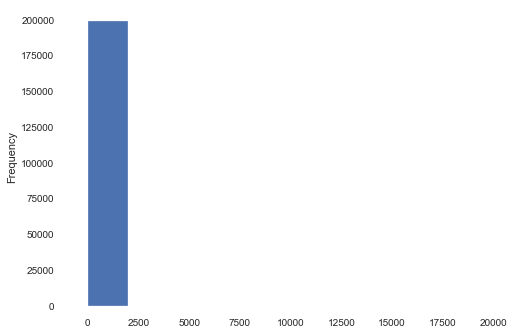

In [115]:
### 构造LR, NN之类模型使用的特征
## 看下数据分布：
data['power'].plot.hist()

## 不做特征工程使用lightgbm进行训练，看测试效果

In [41]:
columns = train_data.columns
feature_columns = columns.tolist()
feature_columns.remove('price')
label_column = 'price'
features = train_data[feature_columns]
labels = train_data[['price']]
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.3)
lgb_model.fit(train_x, train_y, eval_metric='l2', eval_set=[(test_x, test_y)])

In [42]:
xgb_model = XGBRegressor()
lgb_model = LGBMRegressor()

In [56]:
xgb_model.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=1)

In [57]:
predict_lgb = lgb_model.predict(test_x)
predict_xgb = xgb_model.predict(test_x)

In [58]:
print('lgb: ',str(mean_absolute_error(test_y, predict_lgb)))
print('xgb', str(mean_absolute_error(test_y, predict_xgb)))

lgb:  702.2411014972247
xgb 868.4935407146666


### 进行特征工程后的模型效果

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
lbl = LabelEncoder()
data['city'] = lbl.fit_transform(data['city'].astype(str))

In [110]:
columns = data.columns
feature_columns = columns.tolist()
feature_columns.remove('price')
label_column = 'price'
features = data[data['train']==1][feature_columns]
labels = train_data[['price']]
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.3)
lgb_model.fit(train_x, train_y, eval_metric='l2', eval_set=[(test_x, test_y)])

<class 'list'>
[1]	valid_0's l2: 3.95266e+07
<class 'list'>
[2]	valid_0's l2: 3.29327e+07
<class 'list'>
[3]	valid_0's l2: 2.75291e+07
<class 'list'>
[4]	valid_0's l2: 2.3121e+07
<class 'list'>
[5]	valid_0's l2: 1.95288e+07
<class 'list'>
[6]	valid_0's l2: 1.65676e+07
<class 'list'>
[7]	valid_0's l2: 1.41651e+07
<class 'list'>
[8]	valid_0's l2: 1.21746e+07
<class 'list'>
[9]	valid_0's l2: 1.05405e+07
<class 'list'>
[10]	valid_0's l2: 9.23137e+06
<class 'list'>
[11]	valid_0's l2: 8.1056e+06
<class 'list'>
[12]	valid_0's l2: 7.16539e+06
<class 'list'>
[13]	valid_0's l2: 6.38369e+06
<class 'list'>
[14]	valid_0's l2: 5.73926e+06
<class 'list'>
[15]	valid_0's l2: 5.18025e+06
<class 'list'>
[16]	valid_0's l2: 4.71596e+06
<class 'list'>
[17]	valid_0's l2: 4.33732e+06
<class 'list'>
[18]	valid_0's l2: 4.00664e+06
<class 'list'>
[19]	valid_0's l2: 3.73148e+06
<class 'list'>
[20]	valid_0's l2: 3.49478e+06
<class 'list'>
[21]	valid_0's l2: 3.29689e+06
<class 'list'>
[22]	valid_0's l2: 3.12066e+06

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [111]:
predict_lgb = lgb_model.predict(test_x)
print('lgb: ',str(mean_absolute_error(test_y, predict_lgb)))

lgb:  670.7592588195453


**相比于之前的700，做了特征处理后的MAE降到了670**